In [ ]:
#Exercise 1 - Exploring the data 

In [1]:
import numpy as np
import pandas as pd
import os
os.chdir("/Users/millypeacock/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Programming_directory/code/")

file_path = "UNPS_1112_PS2.xls"
df = pd.read_excel(file_path)

# display the first few rows = inspect the data
print(df.head())

           hhid       wave  year  region   district           county  urban  \
0    1013000204  2011-2012  2012       1  KALANGALA         KYAMUSWA      0   
1    1013000206  2011-2012  2012       1    KAMPALA  RUBAGA DIVISION      0   
2    1013000210  2011-2012  2012       1  KALANGALA         KYAMUSWA      0   
3    1013000212  2011-2012  2012       4   KYEGEGWA            KYAKA      0   
4  101300021302  2011-2012  2012       1      MPIGI         MAWOKOTA      0   

   year_surv  month_surv  head_gender  ...       income   wage_labor  \
0       2012           3          1.0  ...   717.277761          NaN   
1       2012           9          1.0  ...  1839.529498   949.476802   
2       2012           2          1.0  ...    91.623072          NaN   
3       2012           3          1.0  ...  2617.802047  1989.529555   
4       2012           4          2.0  ...   811.518634          NaN   

   business_inc   other_inc  agriculture_inc  livestock_inc       wealth  \
0    717.277761 

In [3]:
#a - duplicate households

duplicates = df.duplicated(subset=['hhid'])

# counting the total number of observations in the data
total_observations = df.shape[0]

# counting the number of duplicate households
total_duplicates = duplicates.sum()

if total_duplicates > 0:
    print(f"There are {total_duplicates} duplicate households.")
else:
    print("There are no duplicate households.")

print(f"The total number of observations in the data: {total_observations}")

There are no duplicate households.
The total number of observations in the data: 2613


In [4]:
#b - summary statistics 

# basic summary statistics
summary_stats = df[['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']].describe(percentiles=[0.5])

# checking for missing observations
missing_values = df[['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']].isnull().sum()

# checking for potential outliers
potential_outliers = df[['head_age', 'consumption', 'income', 'wealth']]

# displaying the summary statistics
print(summary_stats)

# commenting on missing observations and potential outliers
print("\nMissing Observations:")
print(missing_values)

print("\nPotential Outliers:")
print(potential_outliers[(potential_outliers < potential_outliers.quantile(0.05)) | (potential_outliers > potential_outliers.quantile(0.95))].count())

       head_gender     head_age   familysize  consumption        income  \
count  2597.000000  2597.000000  2597.000000  2613.000000   2613.000000   
mean      1.314209    46.068156     7.480554  1803.792687   1860.075795   
std       0.464289    15.068960     3.712526  1308.742941   2607.517603   
min       1.000000    14.000000     1.000000   250.305506     27.486921   
50%       1.000000    44.000000     7.000000  1426.614855   1061.194208   
max       2.000000   100.000000    33.000000  8369.898484  52137.736864   

             wealth  
count   2613.000000  
mean    4912.698146  
std     8359.886497  
min        0.000000  
50%     2108.598380  
max    76396.339917  

Missing Observations:
head_gender    16
head_age       16
familysize     16
consumption     0
income          0
wealth          0
dtype: int64

Potential Outliers:
head_age       224
consumption    262
income         262
wealth         262
dtype: int64


In [5]:
#c - dummy female gender variable

# dummy variable 'female_head' based on 'head_gender'
df['female_head'] = (df['head_gender'] == 2).astype(int)

# proportion of households where the head is female
proportion_female = df['female_head'].mean()

print(f"The proportion of households where the head is female: {proportion_female:.2%}")

The proportion of households where the head is female: 31.23%


In [6]:
#d - groupby gender 

# group by 'female_head' and find averages
grouped_data = df.groupby(by='female_head').agg({'consumption': 'mean','familysize': 'mean', 'head_age': 'mean'})

# result
print(grouped_data)

             consumption  familysize   head_age
female_head                                    
0            1899.392959    7.720943  44.388546
1            1593.261206    6.955882  49.734069


In [ ]:
#Exercise 2 - Inequality in Uganda 

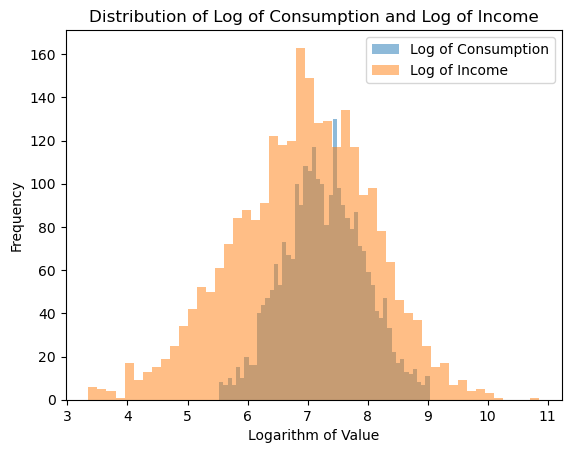

In [7]:
#a - create logged variables and plot 

import matplotlib.pyplot as plt

# converting 'consumption', 'income', and 'wealth' columns to numeric so no nan 
df['consumption'] = pd.to_numeric(df['consumption'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['wealth'] = pd.to_numeric(df['wealth'], errors='coerce')

# log-transformed variables
df['log_c'] = np.log1p(df['consumption'])
df['log_inc'] = np.log1p(df['income'])
df['log_w'] = np.log1p(df['wealth'])

# plot
plt.hist(df['log_c'], bins=50, label='Log of Consumption', alpha=0.5)
plt.hist(df['log_inc'], bins=50, label='Log of Income', alpha=0.5)

# labels and title
plt.xlabel('Logarithm of Value')
plt.ylabel('Frequency')
plt.title('Distribution of Log of Consumption and Log of Income')

# legend
plt.legend()

# show the plot
plt.show()

In [8]:
#b - variance of logs

## variance of logs:
    
variance_log_c = np.var(df['log_c'])
variance_log_inc = np.var(df['log_inc'])
variance_log_w = np.var(df["log_w"])

print(f"Variance of the log of consumption: {variance_log_c:.4f}")
print(f"Variance of the log of income: {variance_log_inc:.4f}")
print(f"Variance of the log of wealth: {variance_log_w:.4f}")

Variance of the log of consumption: 0.4486
Variance of the log of income: 1.3325
Variance of the log of wealth: 2.9748


In [9]:
#c - urban and rural 

## by urban and rural 

grouped_area_data = df.groupby(by='urban').agg({'consumption':'mean', 'income':'mean', 'wealth':'mean'})

#result
print(grouped_area_data)

# are the differences between the two areas large?
print("Clearly larger in urban areas.")

       consumption       income       wealth
urban                                       
0      1629.450928  1713.962054  4520.995235
1      2544.220036  2480.619091  6576.255691
Clearly larger in urban areas.


In [10]:
#d - urban and rural variance

## variance of logs for urban and rural:
    
variance_log_area = df.groupby(by='urban').agg({'log_c':'var', 'log_inc':'var', 'log_w':'var'})

print(variance_log_area)

          log_c   log_inc     log_w
urban                              
0      0.413217  1.336280  2.518233
1      0.438784  1.104759  4.881224


In [11]:
#e - gini coefficient 

##gini coefficient 

#NB: requires sorting data by variable of interest and performing sums 

import scipy as sc

from scipy.stats import rankdata

def gini_coefficient(x):
    n = len(x) #number of observations 
    ranked = rankdata(x) #rank the values in 'x' 
    #gini coeff formula: 
    gini = 1 - (2 * (np.sum((n + 1 - ranked) * x)) / (n * np.sum(x)))
    return gini

## NB: The Gini coefficient captures how far the Lorenz curve falls from the 'line of equality' by comparing the areas A and B, as calculated in the following way: 
    ##Gini coefficient = A / (A + B)
    # rank values in ascending order (hence why we use rankdata i guess)

# gini coeff for cons, income and wealth:
    
gini_consumption = gini_coefficient(df['consumption'].dropna())
gini_income = gini_coefficient(df['income'].dropna())
gini_wealth = gini_coefficient(df['wealth'].dropna())

# nb: dropna removes NaN values 

print(f"Gini coefficient for consumption: {gini_consumption:.4f}")
print(f"Gini coefficient for income: {gini_income:.4f}")
print(f"Gini coefficient for wealth: {gini_wealth:.4f}")

Gini coefficient for consumption: 0.3653
Gini coefficient for income: 0.5552
Gini coefficient for wealth: 0.6564


In [12]:
#f - shares of wealth

## share of wealth - use cumulative dist of wealth 

#sort df by wealth:
df_sorted = df.sort_values(by='wealth', ascending=False)

#cumulative wealth: 
df_sorted['cumulative_wealth']=df_sorted['wealth'].cumsum()

#total wealth:
total_wealth = df_sorted['wealth'].sum()

#share of wealth for different percentiles:
share_bottom_50 = df_sorted[df_sorted['cumulative_wealth'] <= total_wealth * 0.5]['wealth'].sum() / total_wealth
share_top_10 = df_sorted[df_sorted['cumulative_wealth'] <= total_wealth * 0.1]['wealth'].sum() / total_wealth
share_top_5 = df_sorted[df_sorted['cumulative_wealth'] <= total_wealth * 0.05]['wealth'].sum() / total_wealth
share_top_1 = df_sorted[df_sorted['cumulative_wealth'] <= total_wealth * 0.01]['wealth'].sum() / total_wealth

print(f"Share of wealth held by the bottom 50%: {share_bottom_50:.2%}")
print(f"Share of wealth held by the top 10%: {share_top_10:.2%}")
print(f"Share of wealth held by the top 5%: {share_top_5:.2%}")
print(f"Share of wealth held by the top 1%: {share_top_1:.2%}")

Share of wealth held by the bottom 50%: 49.97%
Share of wealth held by the top 10%: 9.75%
Share of wealth held by the top 5%: 4.65%
Share of wealth held by the top 1%: 0.60%


In [ ]:
#Exercise 3 - The lifecycle of male vs female head households in Uganda

Unique values in 'head_age': [ 35.  32.  39.  51.  29.  72.  48.  42.  60.  38.  40.  50.  36.  45.
  31.  37.  44.  27.  59.  54.  49.  28.  24.  56.  66.  33.  22.  23.
  43.  46.  47.  30.  58.  82.  34.  73.  25.  52.  89.  71.  41.  61.
  98.  57.  63.  67.  55.  53.  76.  64.  77. 100.  26.  91.  79.  65.
  62.  nan  83.  68.  74.  81.  70.  84.  75.  87.  86.  92.  20.  69.
  21.  80.  88.  78.  19.  85.  18.  17.  16.  14.  90.  94.  97.]


/var/folders/vb/mxswvzjx65nds_45glkv883r0000gn/T/ipykernel_72609/870570231.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'age_group'] = pd.cut(df_filtered['head_age'], bins=age_bins)


TypeError: Invalid object type at position 0

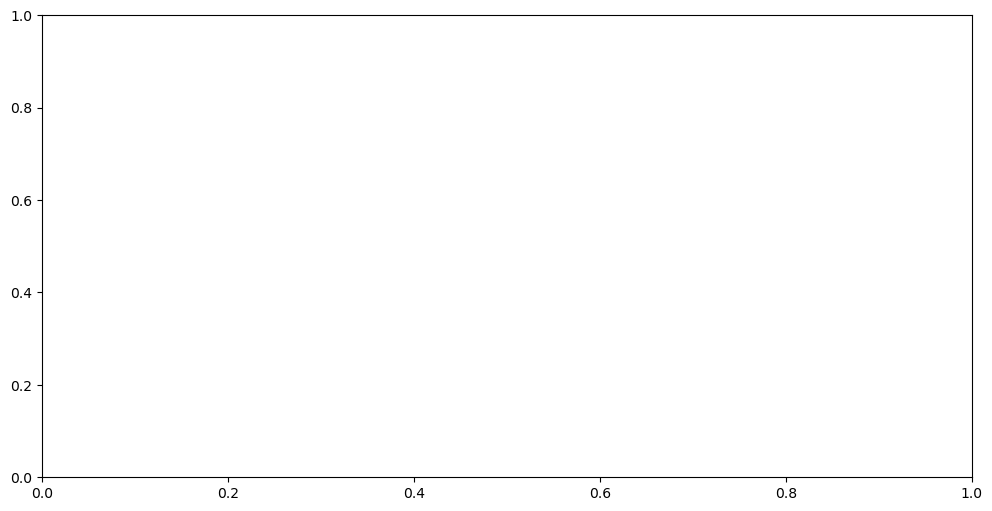

In [13]:
#a - lifecycle of log of consumption 

import seaborn as sns

df['head_age'] = pd.to_numeric(df['head_age'], errors='coerce')

# check
unique_values = df['head_age'].unique()
print("Unique values in 'head_age':", unique_values)

# drop rows with missing numbers ?
df = df.dropna(subset=['head_age'])

df_filtered = df[(df['head_age'] >= 18) & (df['head_age'] <= 80)]

# group ages into bins 
age_bins = [18, 30, 40, 50, 60, 70, 80]
df_filtered.loc[:, 'age_group'] = pd.cut(df_filtered['head_age'], bins=age_bins)

# plots using seaborn 
plt.figure(figsize=(12, 6))
sns.lineplot(x='age_group', y='log_c', hue='head_gender', data=df_filtered)

plt.xlabel('Age Group')
plt.ylabel('Log of Consumption')
plt.title('Lifecycle of Log of Consumption by Gender of Household Head')

# show plot
plt.show()

In [2]:
#error above - cannot work out what is wrong 